In [1]:
import pandas as pd
import seaborn as sns
import glob, os
import numpy as np

In [2]:
df_input = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/mcp/output_0.csv"))))

In [4]:
df_input

,n,l,mean,std
0,3,10,-0.007588,0.812029
1,3,20,0.011875,0.722508
2,3,30,0.070853,0.702062
3,3,40,0.026301,0.669334
4,3,50,-0.047554,0.681533
...,...,...,...,...
133,8,1200,-0.005070,0.112886
134,8,1400,-0.005283,0.114893
135,8,1600,-0.003033,0.111370
136,8,1800,0.007461,0.112498


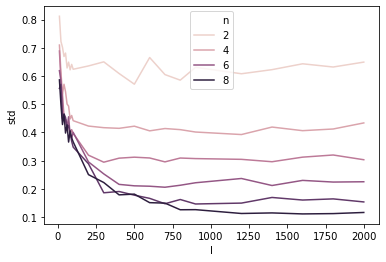

In [5]:
sns.lineplot(
    data=df_input,
    x='l',
    hue='n',
    y='std'
)

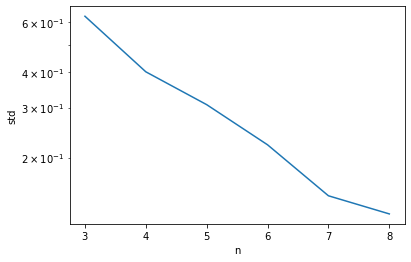

In [7]:
ax = sns.lineplot(
    data=df_input[df_input.l == 900],
    x='n',
    y='std'
)

ax.set_yscale('log')